
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid: 
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

In [2]:
# Installs
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Your imports here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [12]:

# Archivo Dataset
ruta_csv = 'valencia_pollution_dataset.csv'

# Cargar los datos en un DataFrame
df = pd.read_csv(ruta_csv)

# muestra las primeras filas para confirmar que se ha cargado la info
df.head()

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,0.0,10,71.0,0.7,8.0,3.0,Tráfico,2025-05-24T20:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
1,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,5,88.0,NaN,NaN,NaN,Fondo,2025-05-24T20:20:08+00:00,Razonablemente Buena,NaN,NaN,NaN
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,NaN,24,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,NaN,NaN,NaN,15,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN
4,23,Francia,"Avda. de Francia, 60",Urbana,NaN,NaN,1.0,3,82.0,0.1,9.0,6.0,Tráfico,2025-05-24T20:20:04+00:00,Razonablemente Buena,NaN,NaN,NaN


## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [13]:
# Asegurarse de que la columna sea datetime
df['fecha_carga'] = pd.to_datetime(df['fecha_carga'], errors='coerce')

# Obtener fechas válidas
fechas_validas = df['fecha_carga'].dropna()

# Rango temporal
fecha_min = fechas_validas.min()
fecha_max = fechas_validas.max()

print(f"Rango temporal del dataset: desde {fecha_min.date()} hasta {fecha_max.date()}")

Rango temporal del dataset: desde 2025-05-24 hasta 2025-05-26


In [14]:
# contar estaciones considerando que tenga al menos un dato (no nulo)
estaciones_con_co = df[df['co'].notna()]['objectid'].nunique()
print(f"Número de estaciones con sensor de monóxido de carbono (CO): {estaciones_con_co}")

Número de estaciones con sensor de monóxido de carbono (CO): 3


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [15]:
# Agrupar por estación y calcular la media de CO
media_co_por_estacion = df.groupby('objectid')['co'].mean()

# Encontrar el ID con la media más alta
id_max_co = media_co_por_estacion.idxmax()
valor_max_co = media_co_por_estacion.max()

# Obtener el nombre de la estación correspondiente
nombre_estacion = df.loc[df['objectid'] == id_max_co, 'nombre'].iloc[0]

# Mostrar resultados
print(f"ID de estación con mayor media de CO: {id_max_co}")
print(f"Nombre de la estación: {nombre_estacion}")
print(f"Media de CO: {valor_max_co}")

ID de estación con mayor media de CO: 26
Nombre de la estación: Pista de Silla
Media de CO: 0.7


## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

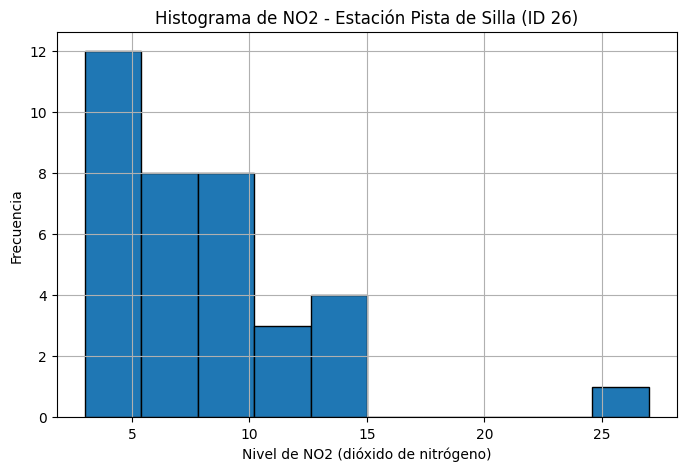

In [16]:
# Filtrar los datos para la estación con ID 26 (Pista de Silla)
estacion_filtrada = df[df['objectid'] == id_max_co]

# Verificar si existen datos válidos de NO2
if estacion_filtrada['no2'].notna().sum() > 0:
    # Crear histograma
    plt.figure(figsize=(8, 5))
    plt.hist(estacion_filtrada['no2'].dropna(), bins=10, edgecolor='black')
    plt.title(f'Histograma de NO2 - Estación Pista de Silla (ID {id_max_co})')
    plt.xlabel('Nivel de NO2 (dióxido de nitrógeno)')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos válidos de NO2 para esta estación.")	

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

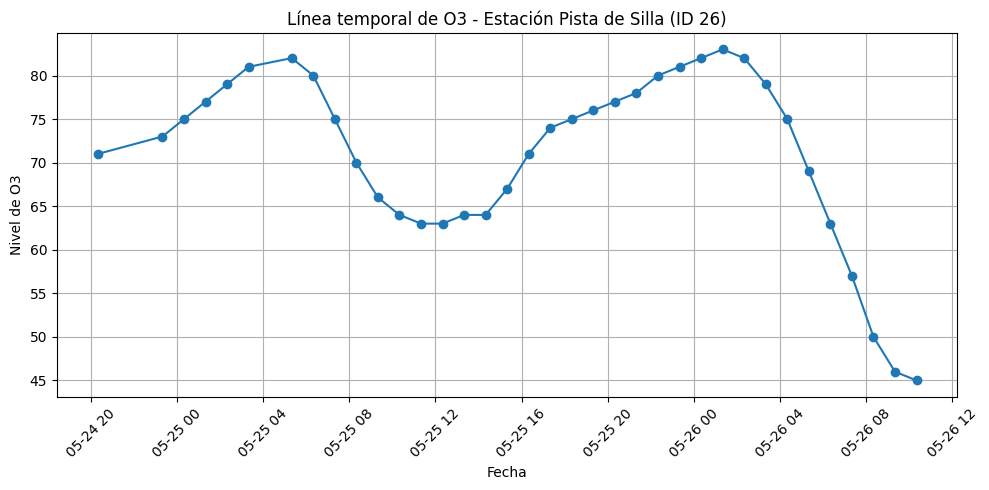

In [20]:
# Asegurar que la columna 'fecha_carga' esté en formato datetime
df['fecha_carga'] = pd.to_datetime(df['fecha_carga'], errors='coerce')

# Filtrar la estación con ID 26 (Pista de Silla)
ozono_estacion = df[df['objectid'] == id_max_co]

# Crear gráfico de línea
plt.figure(figsize=(10, 5))
plt.plot(ozono_estacion['fecha_carga'], ozono_estacion['o3'], marker='o', linestyle='-')
plt.title(f'Línea temporal de O3 - Estación Pista de Silla (ID {id_max_co})')
plt.xlabel('Fecha')
plt.ylabel('Nivel de O3')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

